**Advanced Deep Learning 2023**

**Exercise 2**

**Juuso Paakkunainen 70579167**

1. Tuning the learning rate and momentum of SGD optimizer as a baseline on CIFAR10 dataset with
CNN implementation in Exercise 1, test the different sets of parameters and plot the best you have
found, what is the influence of tuning different sets of parameters?
2. Apply RMSProp, AdaGrad and Adam optimizer to compare the differences with SGD optimizer in
tuning the same parameters they share, explain your discovery as Task 1 asked.

Note:
1. CIFAR10 database link: https://www.cs.toronto.edu/~kriz/cifar.html, in CIFAR10 dataset 50000
images for training and 10000 images for testing
2. List of optimizers in Tensorflow: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [ ]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

In [ ]:
# Defining the activation functions:

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

def tanh(x):
    return tf.tanh(x)

def relu(x):
    return tf.maximum(0.0, x)

def elu(x, alpha=1.0):
    return tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

def selu(x, alpha=1.67326, scale=1.0507):
    return scale * tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

Loading the CIFAR10 dataset and normalizing the pictures

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


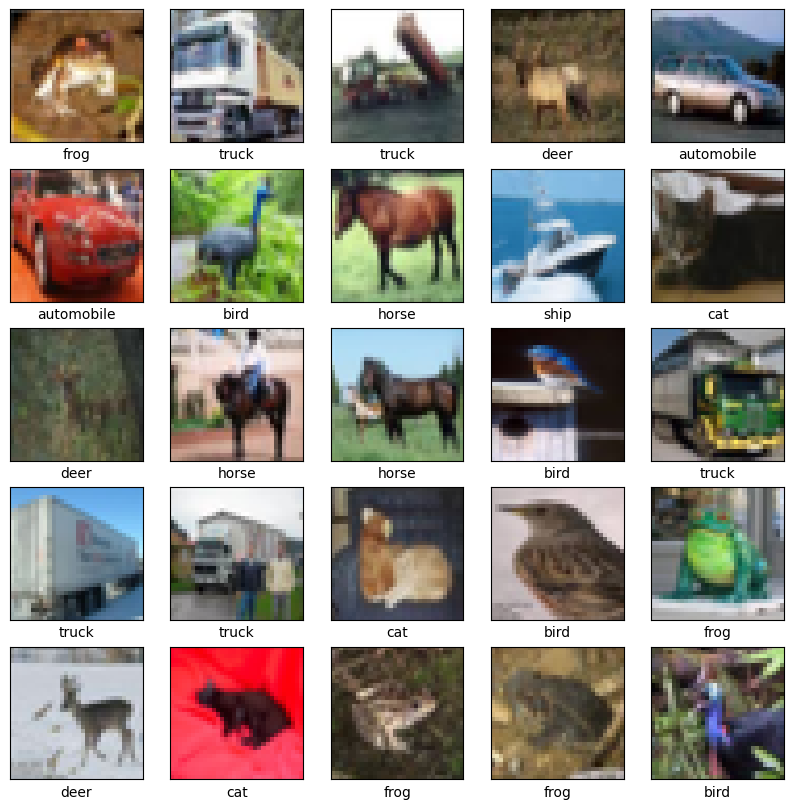

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Building the CNN model for both datasets separately

In [ ]:
def build_model(activation_function, optimizer):

    model = Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10)
    ])
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title + ' - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title + ' - Accuracy')
    plt.legend()
    plt.show()

Training the model on the CIFAR dataset

In [ ]:
# Define the sets of parameters to test
learning_rates = [0.01, 0.001]
momentum_values = [0.9, 0.95, 0.99]


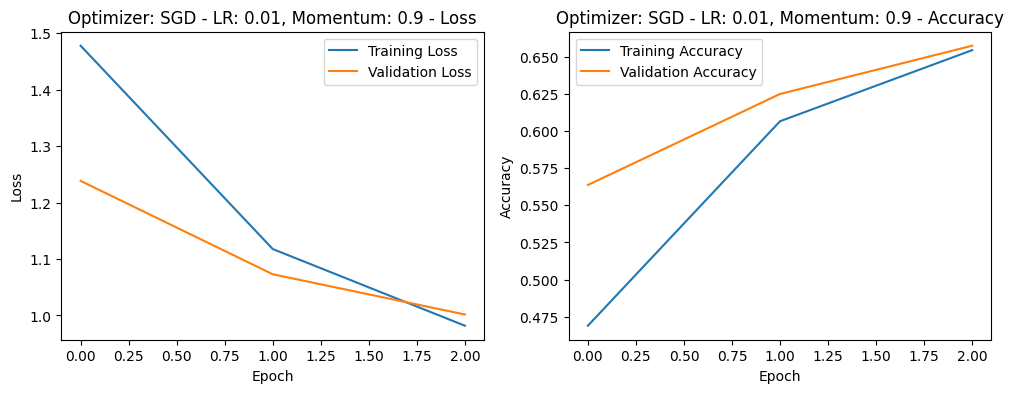

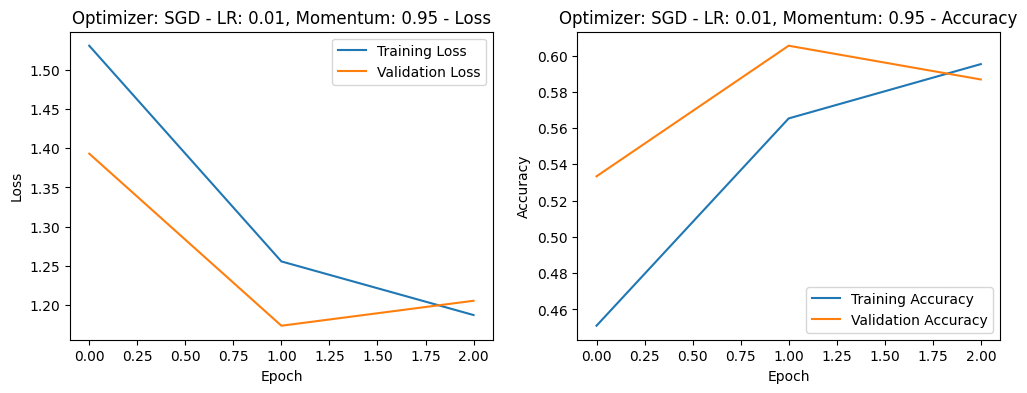

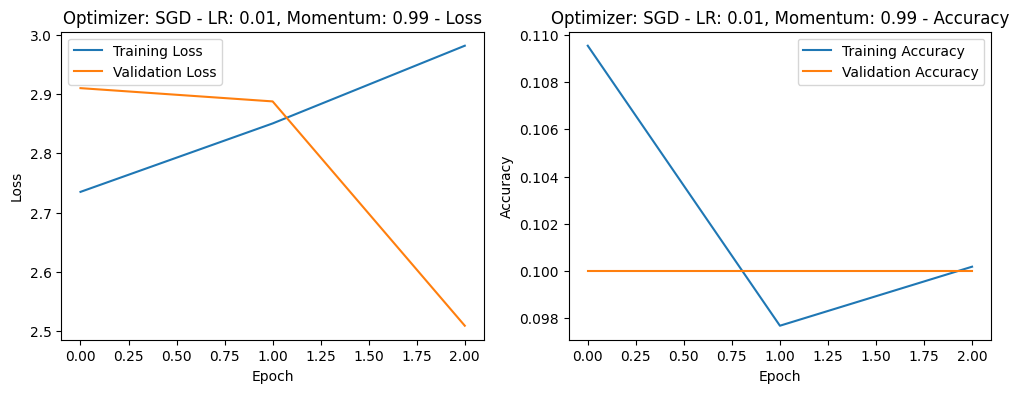

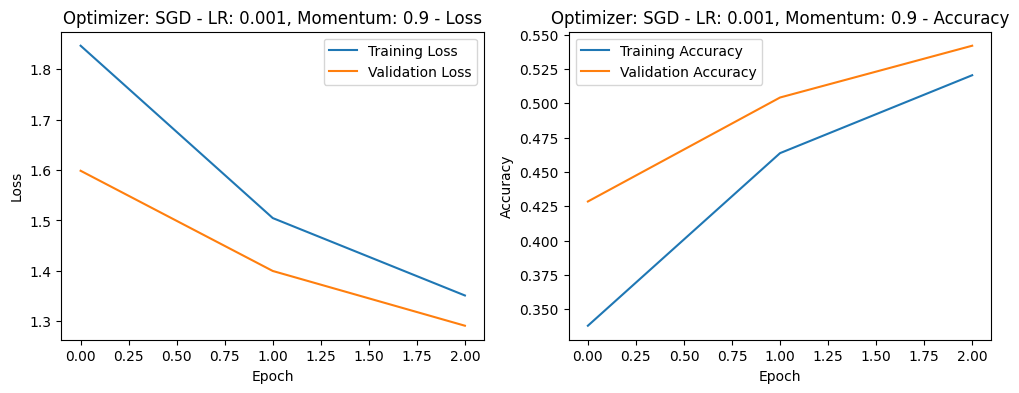

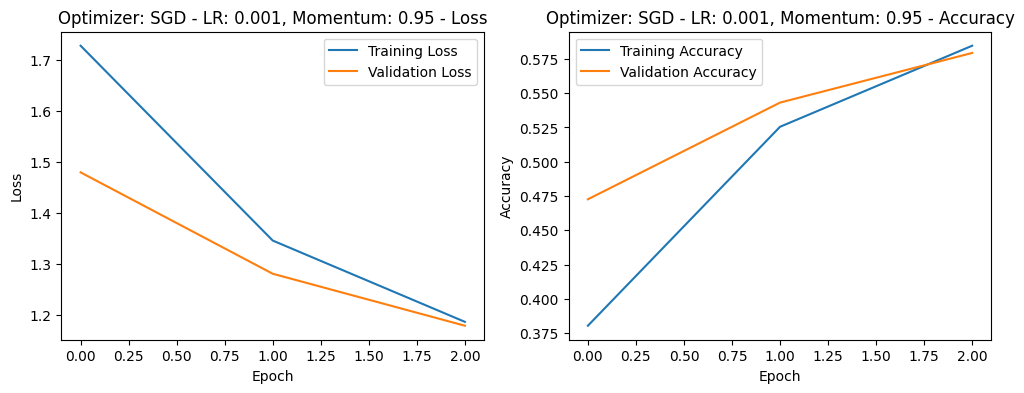

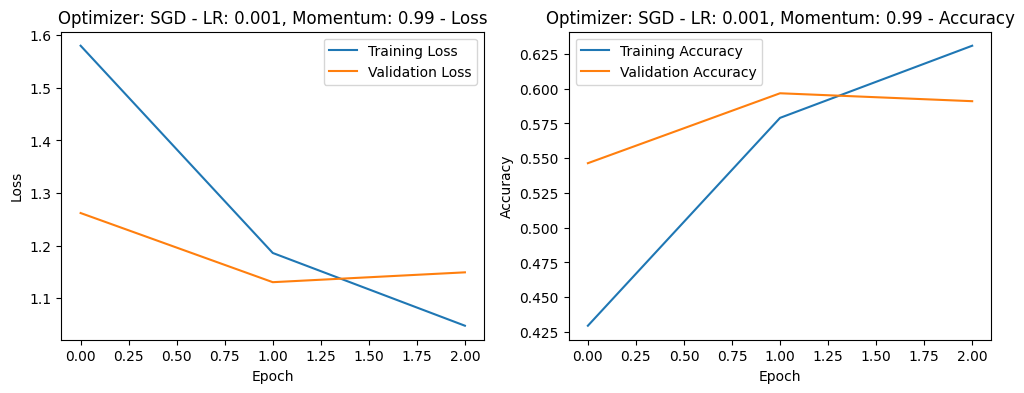

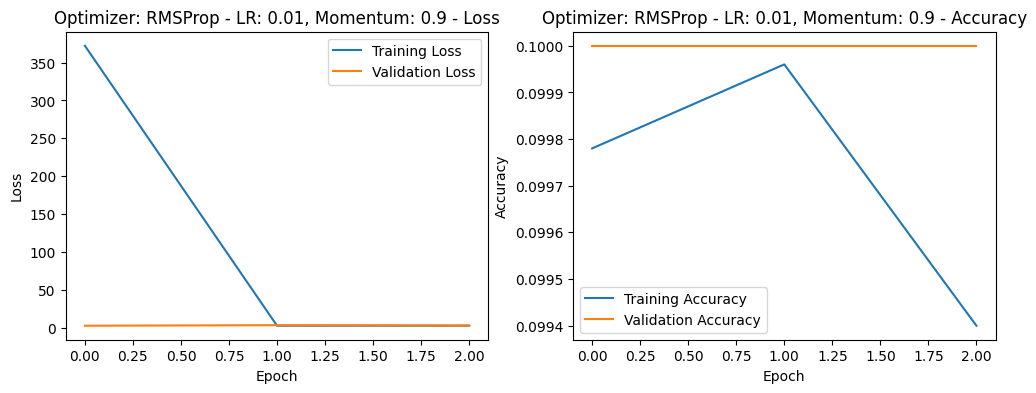

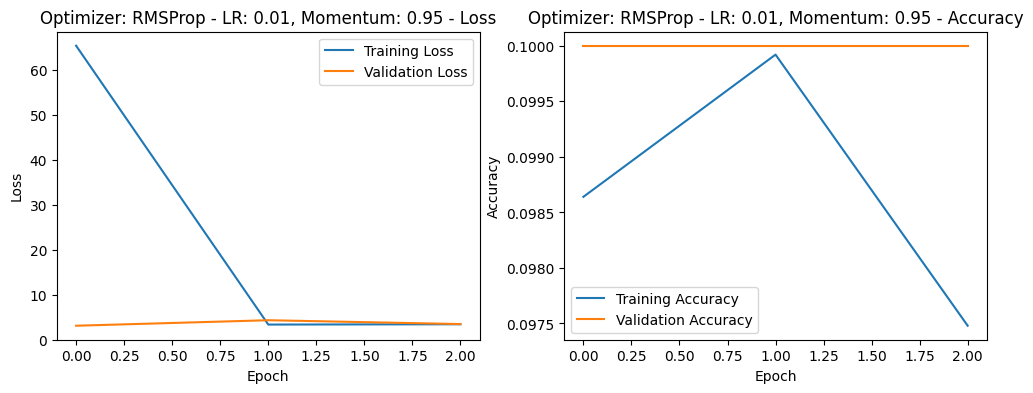

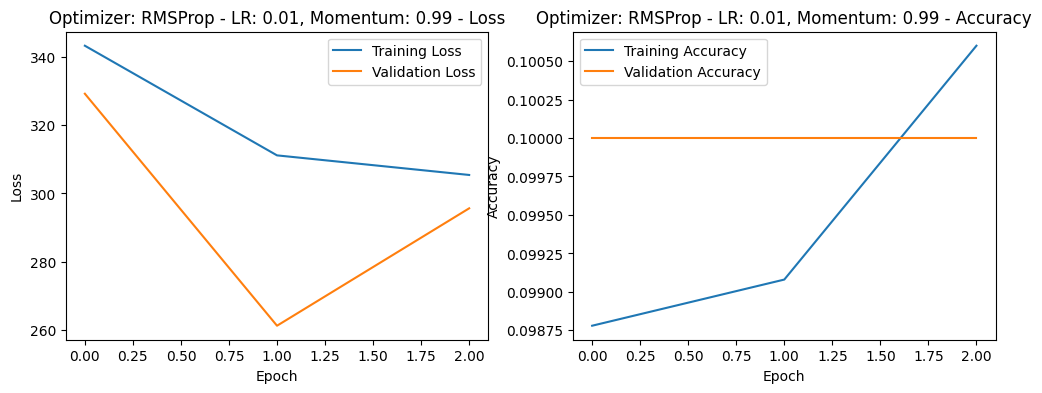

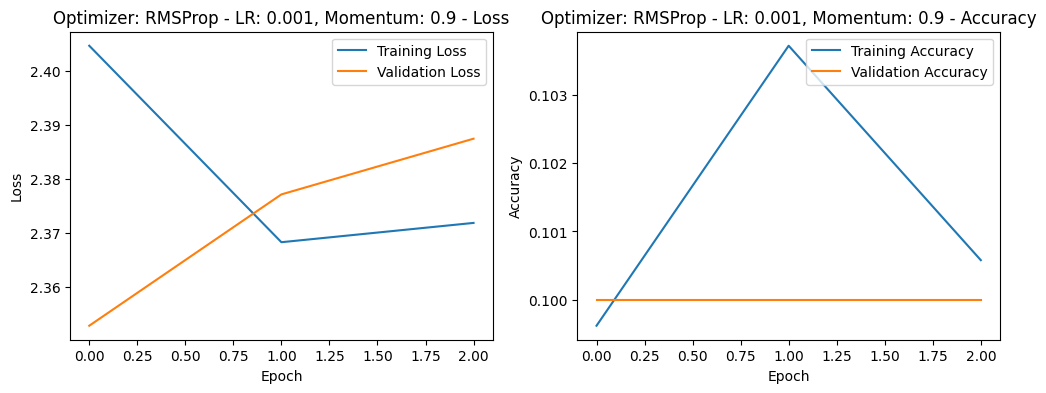

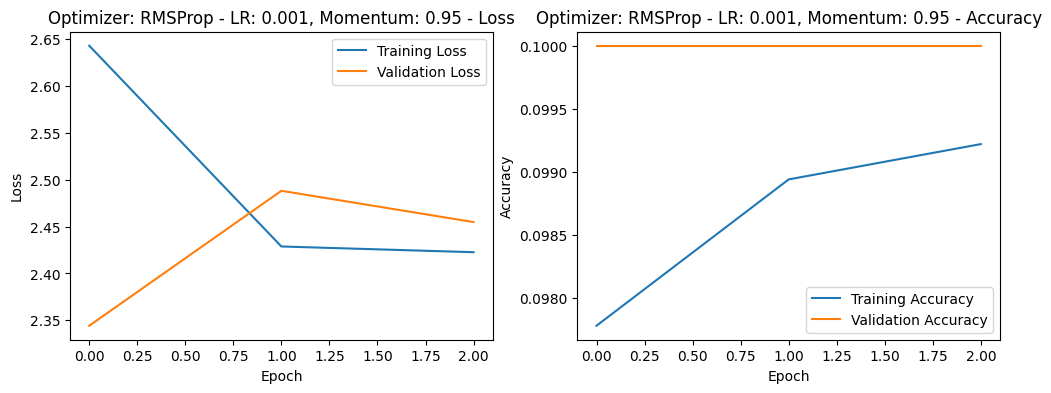

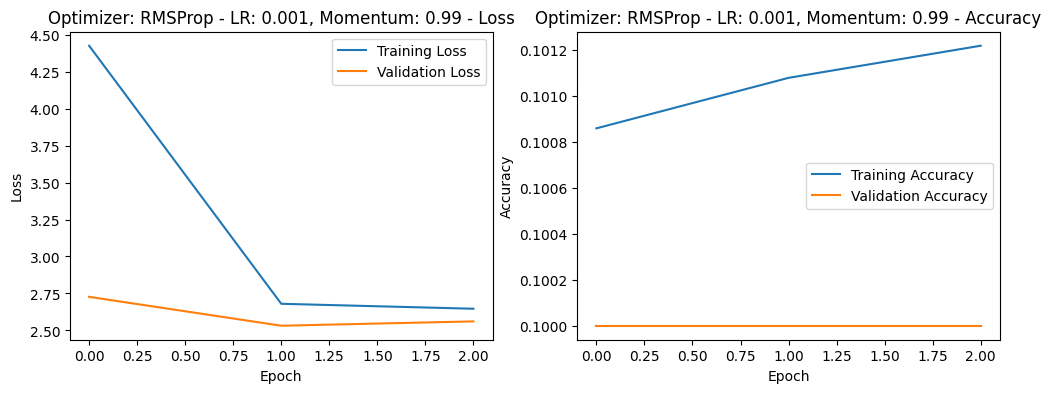

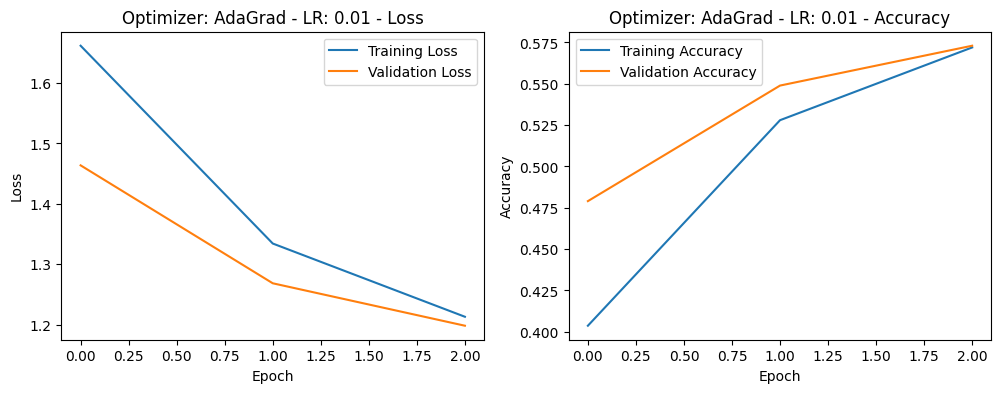

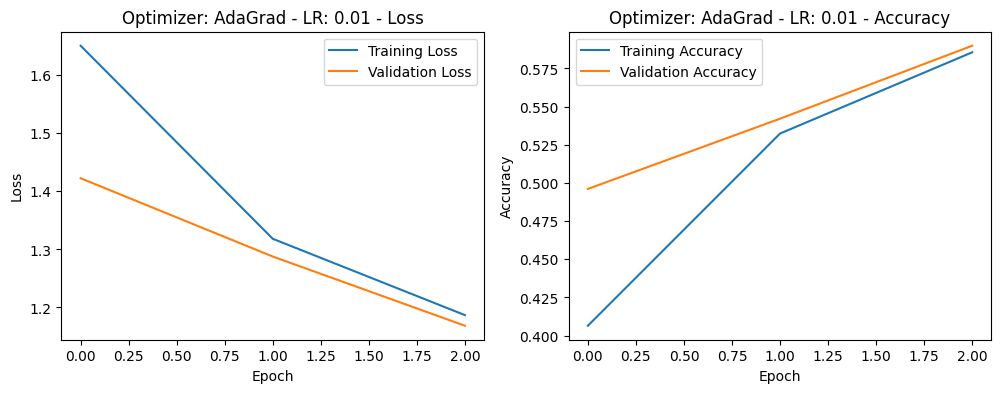

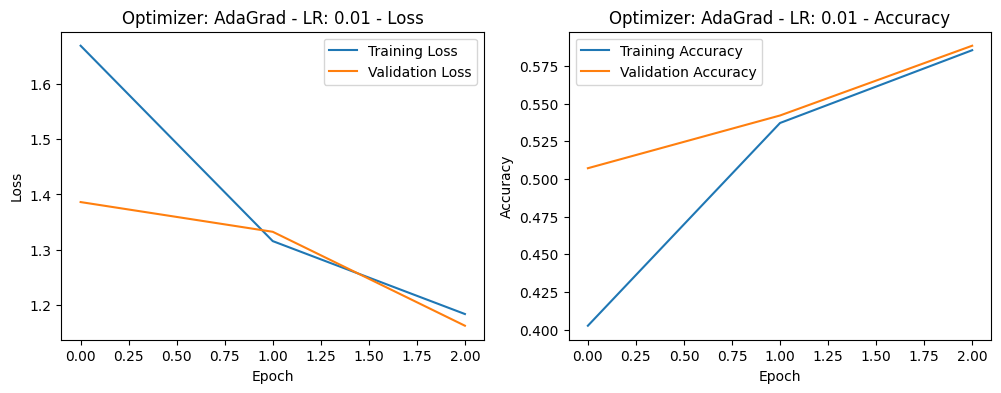

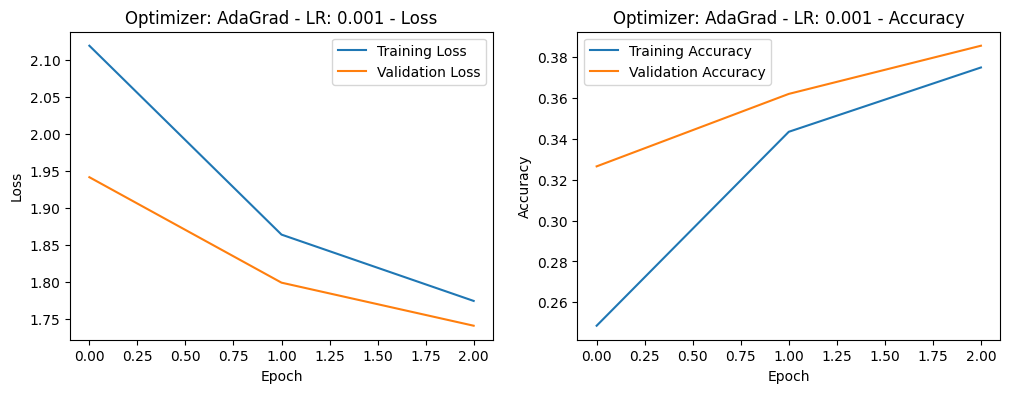

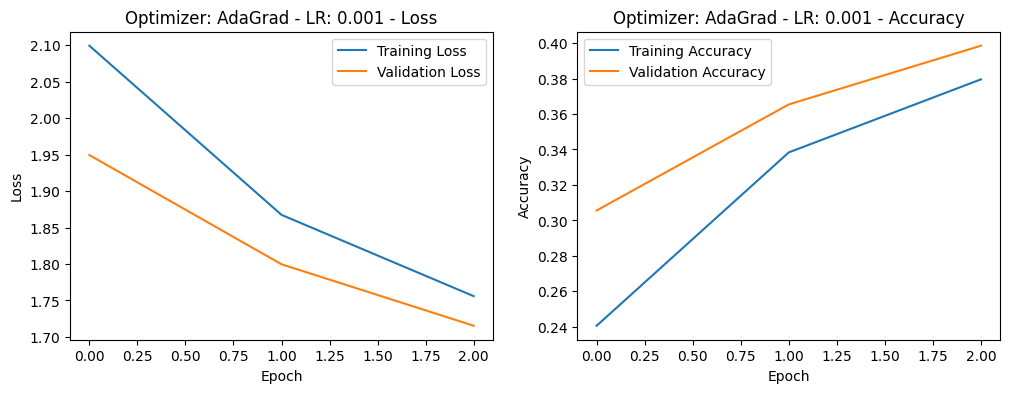

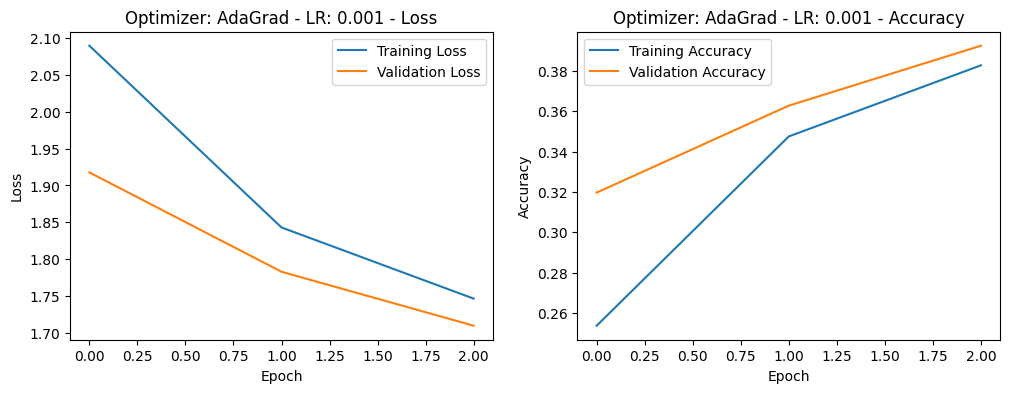

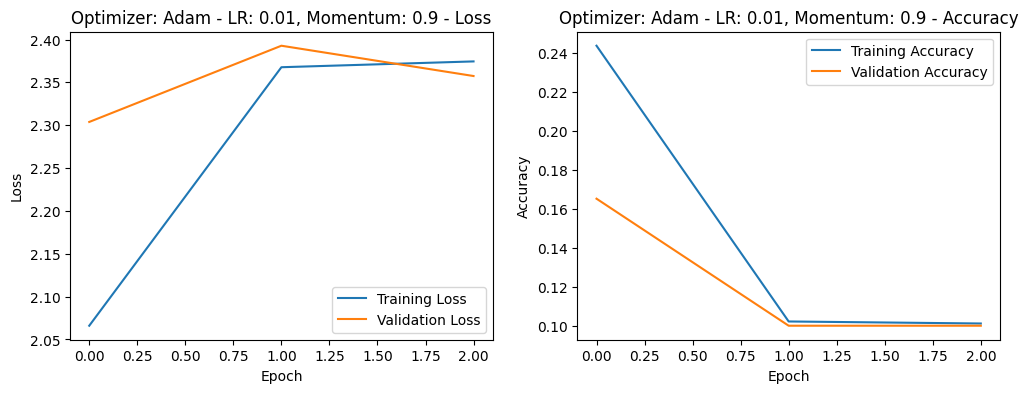

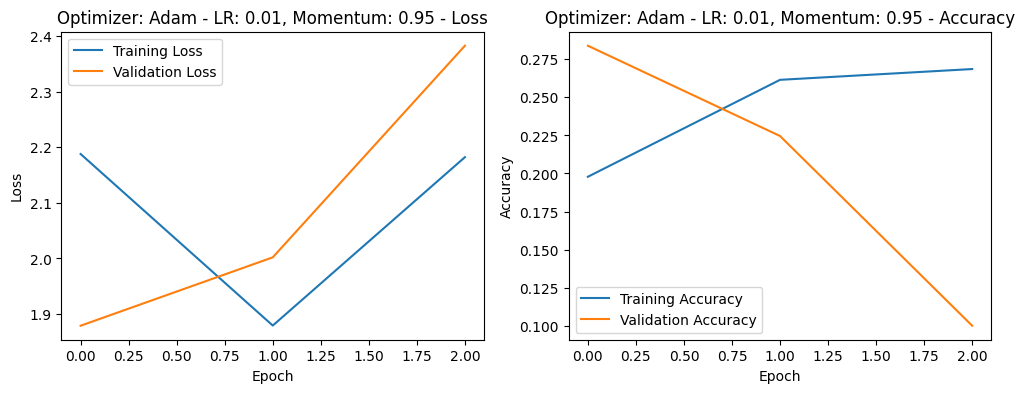

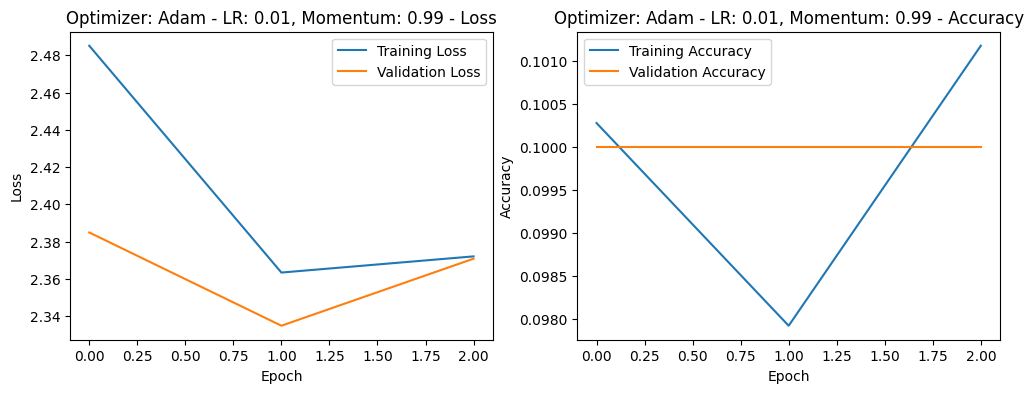

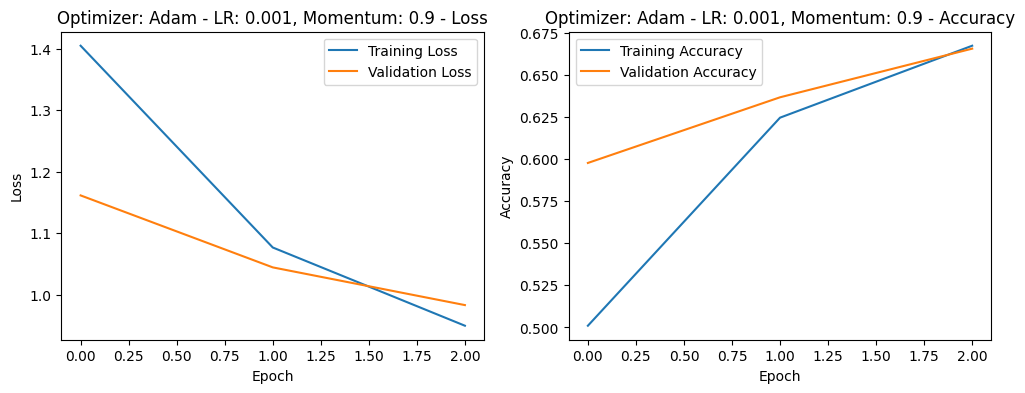

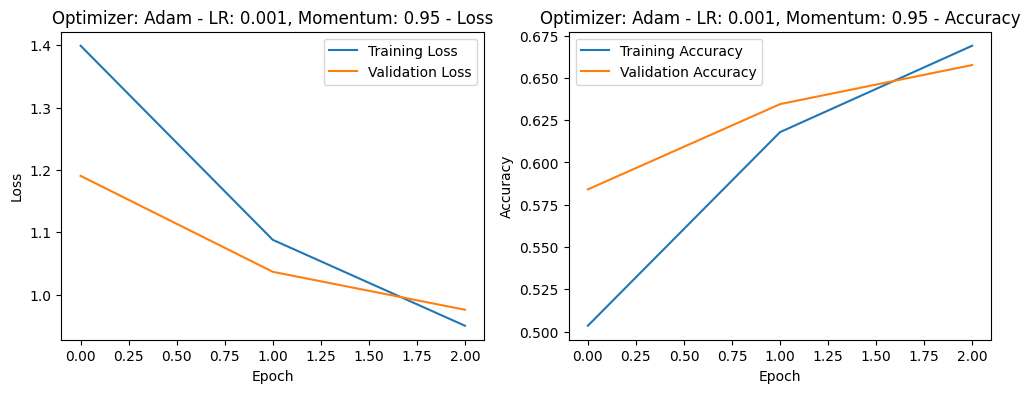

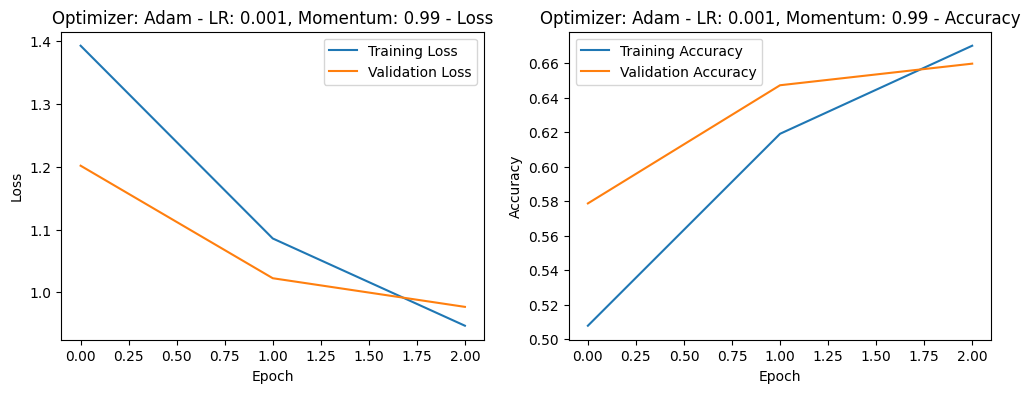

In [ ]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD,
    'RMSProp': tf.keras.optimizers.RMSprop,
    'AdaGrad': tf.keras.optimizers.Adagrad,
    'Adam': tf.keras.optimizers.Adam
}

# Iterate over different optimizers, learning rates, and momentum values
for optimizer_name, optimizer_class in optimizers.items():
    for lr in learning_rates:
        for momentum in momentum_values:
            if optimizer_name == 'Adam':
              optimizer_instance = optimizer_class(learning_rate=lr, beta_1=momentum)
            if optimizer_name in ['SGD', 'RMSProp']:
              optimizer_instance = optimizer_class(learning_rate=lr, momentum=momentum)
            else:
              optimizer_instance = optimizer_class(learning_rate=lr)
            model = build_model(activation_function='elu', optimizer=optimizer_instance)
            history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels), verbose=0)
            # Plot the results
            if optimizer_name != 'AdaGrad':
              title = f'Optimizer: {optimizer_name} - LR: {lr}, Momentum: {momentum}'
            else:
              title = f'Optimizer: {optimizer_name} - LR: {lr}'
            plot_history(history, title=title)
            plt.close()
            K.clear_session()




**Conclusion**

These models were only trained for 3 epochs eachs, since I ran into the problem of running out of RAM in the free tier of Google Collab. This affects the overall performance of the models and makes the findings unreliable.

The optimal combination of learning rate and momentum depends on the specific characteristics of the dataset and the architecture of the neural network. It is common to perform a grid search or random search to find the best combination.

**Learning rate**

Setting a high learning rate may lead to faster convergence, but can result in overshooting and instability. The model might fail to converge or oscillate around the minimum without reaching it.

A low learning rate may result in slow convergence, and the model might get stuck in local minima. However, it may provide better stability and generalize well.

**Momentum**

Higher momentum values (closer to 1) can help the model overcome local minima and accelerate convergence. It provides a smoother and faster convergence trajectory.

Lower momentum values (closer to 0) result in slower convergence, and the optimization process might become more sensitive to noise. However, it might help the model navigate flat regions.

**Optimizers**

SGD had hard time converging and the accuracy scattered a lot with a higher learning rate and higher momentum.

RMSProp struggled a lot with all sets of parameters. RMSProp may struggle with exploding or vanishing gradients. This issue can be addressed by using techniques like gradient clipping or batch normalization.

Adam performed the best, and the optimal combination of parameters was 0.001 learning rate with 0.95 momentum